In this notebook, we will simulate a system that has been proposed by Alan Turing as a model of animal coat pattern formation. Two chemical substances influencing skin pigmentation interact according to a [reaction-diffusion model](https://en.wikipedia.org/wiki/Reaction%E2%80%93diffusion_system). This system is responsible for the formation of patterns that are reminiscent of the pelage of zebras, jaguars, and giraffes.

We will consider reaction-diffusion equation described by a PDE called [Fitzhugh-Nagumo equation](https://en.wikipedia.org/wiki/FitzHugh%E2%80%93Nagumo_model).

$\frac{\partial u}{\partial t} = u - u^3 - v + k + a \Delta u$

$\tau \frac{\partial v}{\partial t} = u - v  + b \Delta v$

The variable u represents the concentration of a substance favoring skin pigmentation, whereas vv represents another substance that reacts with the first and impedes pigmentation. According to Alan Turing two chemical substances influencing skin pigmentation interact according to a reaction-diffusion model.

**Assumptions:**
- At t = 0, u and v contain indepent random number on every grid point
- [Neumann boundary conditions](https://en.wikipedia.org/wiki/Neumann_boundary_condition): the spatial derivatives of the normal components of u and v are null at boundaries of the domain
- Finite difference method on domain $E = [-1,1]^2$: This method consists of discretizing time and space, and replacing the derivatives by their discrete equivalents

Let's import packages

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import datetime, png

%matplotlib inline

Let's now define constants in the model

In [149]:
a = 2.8e-4
b = 5e-3
tau = 0.1
k = -0.005

Let's discretize the time and space. For a stable discretization scheme, we will impose $dt \le \frac{dx^2}{2}$

In [150]:
size = 100 #size of the 2D grid
dx = 2./size #space step
T = 10.0 #total time
dt = .9 * (dx**2)/2 #time step
n = int(T/dt) #number of interations or steps

Let's initialize u and v spatially

In [151]:
U = np.random.rand(size,size)
V = np.random.rand(size,size)

We define a function that computes the discrete Laplace operator of a 2D variable on the grid, using a five-point stencil finite difference method. The change in u at a point (x,y) on a grid is defined as

$\Delta (x,y) = \frac{u(x+h,y) + u(x-h,y) + u(x,y+h) + u(x,y-h) + 4u(x,y)}{dx^2} $

Using vectorized matrix operations, we compute the values of this operator on the grid. Moreover, due to side effects on the edges of the matrix, we need to remove the borders of the grid in the computation.

In [152]:
def laplacian(Z):
    Ztop = Z[0:-2,1:-1]
    Zbottom = Z[2:,1:-1]
    Zleft = Z[1:-1,0:-2]
    Zright = Z[1:-1,2:]
    Zcenter = Z[1:-1,1:-1]
    return (Ztop + Zleft + Zbottom + Zright - 4 * Zcenter) / dx**2

We can now simulate the system of equations using the finite difference method. At each time step, we compute the right-hand sides of the two equations on the grid using discrete spatial derivatives (Laplacians). Then, we update the variables using a discrete time derivative

In [153]:
# initiate variables to save values of U and V for a later dynamical display
Us = [U] 
Vs = [V]
#U = np.random.rand(size,size)
#V = np.random.rand(size,size)
tic = datetime.datetime.now()
for i in range(n):
    # We compute the Laplacian of u and v.
    deltaU = laplacian(U)
    deltaV = laplacian(V)
    # We take the values of u and v inside the grid.
    Uc = U[1:-1,1:-1]
    Vc = V[1:-1,1:-1]
    # We update the variables.
    U[1:-1,1:-1], V[1:-1,1:-1] = \
        Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k), \
        Vc + dt * (b * deltaV + Uc - Vc) / tau
    
    # Neumann conditions: derivatives at the edges are null.
    for Z in (U, V):
        Z[0,:] = Z[1,:]
        Z[-1,:] = Z[-2,:]
        Z[:,0] = Z[:,1]
        Z[:,-1] = Z[:,-2]
    Us.append(U)
    Vs.append(V)
print "Computation time for ",n,"steps:", datetime.datetime.now()-tic

Computation time for  55555 steps: 0:00:35.050694


Finally, we display the variable u after a time T of simulation

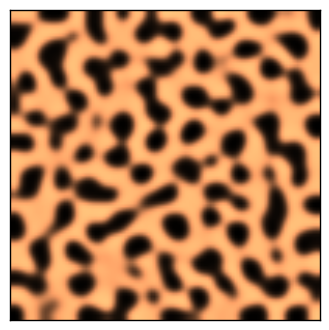

In [154]:
plt.imshow(U, cmap=plt.cm.copper, extent=[-1,1,-1,1]);
plt.xticks([]); plt.yticks([]);
plt.show()